<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Time_series/Time_series_all_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

## Alpha vantage

In [ ]:
!pip install alpha_vantage

In [11]:
api_key = 'VHR4VD5LDC1NL12S'

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2020-09-03 20:00:00   213.75   213.98  213.50    213.98     1784.0
2020-09-03 19:59:00   213.43   213.56  213.43    213.56     2984.0
2020-09-03 19:58:00   213.34   213.45  213.32    213.32     3764.0
2020-09-03 19:57:00   213.50   213.50  213.40    213.48     2108.0
2020-09-03 19:56:00   213.80   213.80  213.50    213.50     5499.0
...                      ...      ...     ...       ...        ...
2020-08-21 04:32:00   213.64   213.64  213.56    213.56      562.0
2020-08-21 04:22:00   214.00   214.00  214.00    214.00      321.0
2020-08-21 04:07:00   214.19   214.19  214.19    214.19      100.0
2020-08-21 04:04:00   214.16   214.16  214.16    214.16      142.0
2020-08-21 04:01:00   214.07   214.07  214.00    214.00     1191.0

[7052 rows x 5 columns]


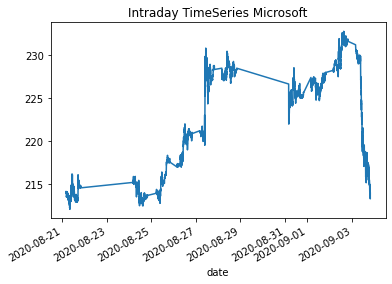

In [6]:
#1. Time Series Intraday
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

ts = TimeSeries(key=api_key,output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
print(data)

data['4. close'].plot()
plt.title('Intraday TimeSeries Microsoft')
plt.show()

                          SMA
date                         
2020-08-21 07:37:00  213.6147
2020-08-21 07:39:00  213.5978
2020-08-21 07:40:00  213.5778
2020-08-21 07:41:00  213.5580
2020-08-21 07:42:00  213.5413
...                       ...
2020-09-03 19:56:00  214.5200
2020-09-03 19:57:00  214.4947
2020-09-03 19:58:00  214.4650
2020-09-03 19:59:00  214.4322
2020-09-03 20:00:00  214.4068

[6993 rows x 1 columns]
date
2020-08-21 07:37:00    215.18
2020-08-21 07:39:00    215.50
2020-08-21 07:40:00    215.53
2020-08-21 07:41:00    215.10
2020-08-21 07:42:00    215.00
                        ...  
2020-09-03 19:56:00    213.56
2020-09-03 19:57:00    214.00
2020-09-03 19:58:00    214.19
2020-09-03 19:59:00    214.16
2020-09-03 20:00:00    214.00
Name: 4. close, Length: 6993, dtype: float64
                          SMA  4. close
date                                   
2020-08-21 07:37:00  213.6147    215.18
2020-08-21 07:39:00  213.5978    215.50
2020-08-21 07:40:00  213.5778    215.53
2020-

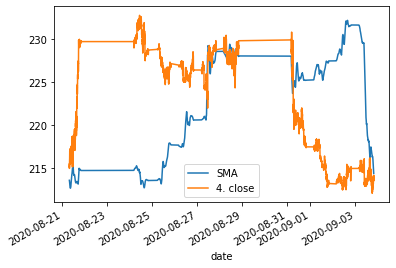

In [7]:
#2. Simple Moving Average VS. Intraday Time Series


import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')

periods = 60

ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_sma(symbol='MSFT', interval='1min', 
                         time_period=60, series_type='close')


df1 = data_ti
df2 = data_ts['4. close'].iloc[periods-1::]

print(df1)
df2.index = df1.index
print(df2)

total_df = pd.concat([df1,df2], axis=1)
print(total_df)

total_df.plot()
plt.show()

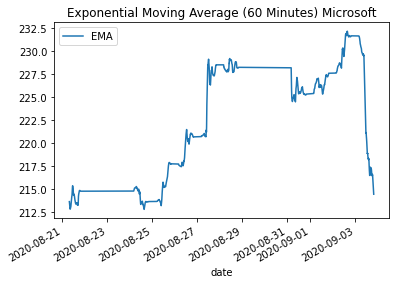

In [8]:
# 3. Exponential Moving Average

import pandas as pd
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_ema(symbol='MSFT', interval='1min', 
                         time_period=60, series_type='close')

data.plot()
plt.title('Exponential Moving Average (60 Minutes) Microsoft')
plt.show()

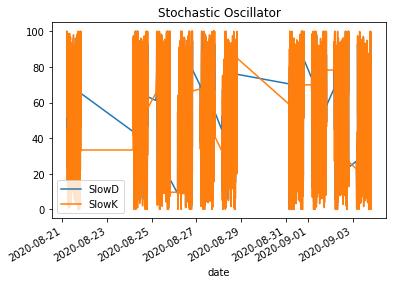

In [9]:
# 4. Stoichastic Oscillator
import pandas as pd
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_stoch(symbol='MSFT', interval='1min')

data.plot()
plt.title('Stochastic Oscillator')
plt.show()

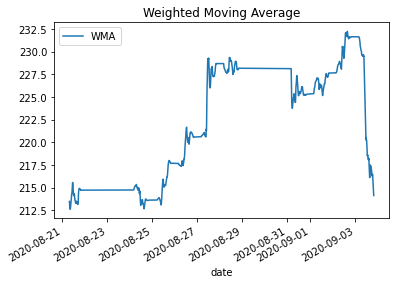

In [12]:
#5. Weighted Moving Average
import pandas as pd
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_wma(symbol='MSFT', interval='1min', time_period=60, series_type='close')

data.plot()
plt.title('Weighted Moving Average')
plt.show()

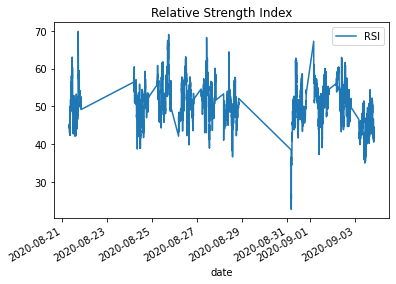

In [13]:
#6. Relative Strength Index

import pandas as pd
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_rsi(symbol='MSFT', interval='1min', time_period=60, series_type='close')

data.plot()
plt.title('Relative Strength Index')
plt.show()

                         RSI
date                        
2020-08-21 05:20:00  52.5000
2020-08-21 05:22:00  46.7146
2020-08-21 05:25:00  46.7146
2020-08-21 05:28:00  50.8142
2020-08-21 05:29:00  49.9859
...                      ...
2020-09-03 19:56:00  35.6555
2020-09-03 19:57:00  35.2984
2020-09-03 19:58:00  32.4947
2020-09-03 19:59:00  40.1711
2020-09-03 20:00:00  50.7300

[7038 rows x 1 columns]
date
2020-09-03 19:46:00    213.96
2020-09-03 19:45:00    214.00
2020-09-03 19:44:00    214.02
2020-09-03 19:43:00    214.34
2020-09-03 19:42:00    214.50
                        ...  
2020-08-21 04:32:00    213.56
2020-08-21 04:22:00    214.00
2020-08-21 04:07:00    214.19
2020-08-21 04:04:00    214.16
2020-08-21 04:01:00    214.00
Name: 4. close, Length: 7038, dtype: float64


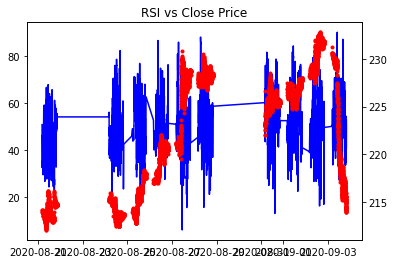

In [15]:
#7. RSI vs Close prices

import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
import matplotlib.pyplot as plt

ts = TimeSeries(key=api_key, output_format='pandas')
data_ts, meta_data_ts = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')

periods = 14

ti = TechIndicators(key=api_key, output_format='pandas')
data_ti, meta_data_ti = ti.get_rsi(symbol='MSFT', interval='1min',
                         time_period=periods, series_type='close')


df1 = data_ti
df2 = data_ts['4. close'].iloc[periods::]

print(df1)
df1.index = df2.index
print(df2)

fig, ax1 = plt.subplots()
ax1.plot(df1, 'b-')
ax2 = ax1.twinx()
ax2.plot(df2, 'r.')
plt.title('RSI vs Close Price')
plt.show()

## Yahoo

In [16]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=5e8c4eabfa330a16906e51ee9390a1222d469efd43c6b417ae8c7cd5a4c3fe59
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [21]:
import pandas as pd 
import numpy as np
import yfinance as yf
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

df_twtr = yf.download('AAPL', 
                       start='2018-01-01', 
                       #end='2018-12-31',
                       progress=False,
                       auto_adjust=True)
df_twtr

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,41.007496,41.523222,40.790599,41.513580,102223600
2018-01-03,41.578643,42.065451,41.441278,41.506344,118071600
2018-01-04,41.581050,41.805176,41.470195,41.699139,89738400
2018-01-05,41.797943,42.263059,41.703956,42.173893,94640000
2018-01-08,42.017254,42.320905,41.916033,42.017254,82271200
...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,225702700
2020-09-01,132.759995,134.800003,130.529999,134.179993,152470100
2020-09-02,137.589996,137.979996,127.000000,131.399994,200119000


## Pandas datareader

### yahoo OK

In [24]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [34]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
#tickers = ['AAPL', 'MSFT', '^GSPC']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2020-01-01'
end_date = '2016-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('AAPL', 'yahoo', start_date,
                             #end_date
                             )
panel_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.573036
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.848030
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.436470
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,74.086395
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.278160
...,...,...,...,...,...,...
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,129.039993
2020-09-01,134.800003,130.529999,132.759995,134.179993,152470100.0,134.179993
2020-09-02,137.979996,127.000000,137.589996,131.399994,200119000.0,131.399994


### tiingo OK

In [30]:
import pandas_datareader as pdr
df = pdr.get_data_tiingo('MSFT', start='2019-01-01', 
                         #end='2020-05-30', 
                         api_key='47eea91d37bcf30b4e1e3ef0365846e8041b4aa8')
df

close      high  ...  divCash  splitFactor
symbol date                                         ...                      
MSFT   2019-01-02 00:00:00+00:00  101.12  101.7500  ...      0.0          1.0
       2019-01-03 00:00:00+00:00   97.40  100.1900  ...      0.0          1.0
       2019-01-04 00:00:00+00:00  101.93  102.5100  ...      0.0          1.0
       2019-01-07 00:00:00+00:00  102.06  103.2700  ...      0.0          1.0
       2019-01-08 00:00:00+00:00  102.80  103.9700  ...      0.0          1.0
...                                  ...       ...  ...      ...          ...
       2020-08-31 00:00:00+00:00  225.53  228.7000  ...      0.0          1.0
       2020-09-01 00:00:00+00:00  227.27  227.4500  ...      0.0          1.0
       2020-09-02 00:00:00+00:00  231.65  232.8600  ...      0.0          1.0
       2020-09-03 00:00:00+00:00  217.30  229.3100  ...      0.0          1.0
       2020-09-04 00:00:00+00:00  214.25  218.3599  ...      0.0          1.0

[424 rows x 12 columns]

### Alpha Vantage OK

In [35]:
#Alpha Vantage
import os
from datetime import datetime
import pandas_datareader.data as web
f = web.DataReader("AAPL", "av-daily", start=datetime(2019, 2, 9),
                   #end=datetime(2017, 5, 24),
                   api_key='VHR4VD5LDC1NL12S')
f

,open,high,low,close,volume
2017-02-09,131.65,132.445,131.12,132.42,28349859
2017-02-10,132.46,132.940,132.05,132.12,20065458
2017-02-13,133.08,133.820,132.75,133.29,23035421
2017-02-14,133.47,135.090,133.25,135.02,33226223
2017-02-15,135.52,136.270,134.62,135.51,35623100
...,...,...,...,...,...
2020-08-31,127.58,131.000,126.00,129.04,223505733
2020-09-01,132.76,134.800,130.53,134.18,152470142
2020-09-02,137.59,137.980,127.00,131.40,200118991
2020-09-03,126.91,128.840,120.50,120.88,257599640


In [43]:
import pandas_datareader.data as web
f = web.DataReader("USD/JPY", "av-forex",api_key='VHR4VD5LDC1NL12S')
f

,USD/JPY
From_Currency Code,USD
From_Currency Name,United States Dollar
To_Currency Code,JPY
To_Currency Name,Japanese Yen
Exchange Rate,106.23200000
Last Refreshed,2020-09-05 02:57:05
Time Zone,UTC
Bid Price,106.23049682
Ask Price,106.23402903


In [44]:
f = web.DataReader(["USD/JPY", "BTC/CNY"], "av-forex",api_key='VHR4VD5LDC1NL12S')
f

,USD/JPY,BTC/CNY
From_Currency Code,USD,BTC
From_Currency Name,United States Dollar,Bitcoin
To_Currency Code,JPY,CNY
To_Currency Name,Japanese Yen,Chinese Yuan
Exchange Rate,106.23200000,71370.19871600
Last Refreshed,2020-09-05 02:57:05,2020-09-05 02:57:07
Time Zone,UTC,UTC
Bid Price,106.23049682,71370.19871600
Ask Price,106.23402903,71370.26714400


In [42]:
#Alpha Vantage 
#Sector Performance
import pandas_datareader.data as web
web.get_sector_performance_av(api_key='VHR4VD5LDC1NL12S').head()

,RT,1D,5D,1M,3M,YTD,1Y,3Y,5Y,10Y
Financials,0.77%,0.77%,-0.36%,4.85%,2.16%,-18.03%,-4.88%,2.19%,35.15%,114.77%
Industrials,0.21%,0.21%,-1.25%,7.81%,9.07%,-4.62%,4.56%,12.51%,49.46%,152.26%
Materials,0.13%,0.13%,0.79%,7.29%,11.04%,4.92%,15.29%,16.72%,50.84%,104.48%
Consumer Staples,-0.24%,-0.24%,-0.47%,4.70%,9.55%,3.63%,7.38%,18.85%,38.65%,138.27%
Energy,-0.33%,-0.33%,-4.46%,-4.58%,-17.00%,-42.97%,-37.98%,-44.06%,-44.89%,-35.79%


### IEX

In [46]:
import pandas_datareader.data as web
from datetime import datetime
start = datetime(2019, 9, 1)
end = datetime(2018, 9, 1)
f = web.DataReader('F', 'iex', start, 
                   #end,
                   api_key='pk_43b75da6f5ca44d98ae749dbba17ce7a'
                   )
f

,open,high,low,close,volume
date,,,,,
2019-09-03,9.18,9.20,9.04,9.10,26331720
2019-09-04,9.17,9.23,9.07,9.20,27410227
2019-09-05,9.25,9.40,9.25,9.34,36640467
2019-09-06,9.37,9.41,9.20,9.34,29210272
2019-09-09,9.39,9.65,9.39,9.54,48059365
...,...,...,...,...,...
2020-08-28,6.93,6.95,6.86,6.94,39936920
2020-08-31,6.90,6.93,6.79,6.82,50089521
2020-09-01,6.77,6.87,6.72,6.83,48214176


### Econdb

Econdb provides economic data from 90+ official statistical agencies. Free API allows access to the complete Econdb database of time series aggregated into datasets.

In [47]:
import pandas_datareader.data as web
f = web.DataReader('ticker=RGDPUS', 'econdb')
f

TableName,T10106
SeriesCode,A191RX
Table,"Table 1.1.6. Real Gross Domestic Product, Chained Dollars (A) (Q)"
Series description,Gross domestic product
CL_UNIT,Level
CL_FREQ,Q
TIME_PERIOD,
2015-10-01,17514062
2016-01-01,17613264
2016-04-01,17668204
2016-07-01,17764388


### Enigma

Access datasets from Enigma, the world’s largest repository of structured public data. Note that the Enigma URL has changed from app.enigma.io as of release 0.6.0, as the old API deprecated.

Datasets are unique identified by the uuid4 at the end of a dataset’s web address. For example, the following code downloads from USDA Food Recalls 1996 Data.

In [49]:
import pandas_datareader as pdr
df = pdr.get_data_enigma('292129b0-1275-44c8-a6a3-2a0881f24fe1',
                         )
df

JSONDecodeError: ignored

### Quandl

Daily financial data (prices of stocks, ETFs etc.) from Quandl. The symbol names consist of two parts: DB name and symbol name. DB names can be all the free ones listed on the Quandl website. Symbol names vary with DB name; for WIKI (US stocks), they are the common ticker symbols, in some other cases (such as FSE) they can be a bit strange. Some sources are also mapped to suitable ISO country codes in the dot suffix style shown above, currently available for BE, CN, DE, FR, IN, JP, NL, PT, UK, US.

As of June 2017, each DB has a different data schema, the coverage in terms of time range is sometimes surprisingly small, and the data quality is not always good.

In [55]:
import pandas_datareader.data as web
symbol = 'AAPL.US' 
start_date = '2016-01-01'
end_date = '2016-12-31'
df = web.DataReader(symbol, 'quandl', start_date, 
                    #end_date,
                    api_key='yz7qGzikAuQL9wn7rrX-')
df

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,173.68,175.150,166.92,168.340,38962839.0,0.0,1.0,173.680000,175.150000,166.920000,168.340000,38962839.0
2018-03-26,168.07,173.100,166.44,172.770,36272617.0,0.0,1.0,168.070000,173.100000,166.440000,172.770000,36272617.0
2018-03-23,168.39,169.920,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0
2018-03-22,170.00,172.680,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-21,175.04,175.090,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,98.55,99.110,96.76,96.960,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0
2016-01-07,98.68,100.130,96.43,96.450,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
2016-01-06,100.56,102.370,99.87,100.700,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0


### FRED

In [59]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2013, 1, 27)
gdp = web.DataReader('GDP', 'fred', start, 
                     #end
                     )
gdp

,GDP
DATE,
2015-01-01,18003.399
2015-04-01,18223.577
2015-07-01,18347.425
2015-10-01,18378.803
2016-01-01,18470.156
2016-04-01,18656.207
2016-07-01,18821.359
2016-10-01,19032.580
2017-01-01,19237.435


In [60]:
inflation = web.DataReader(['CPIAUCSL', 'CPILFESL'], 'fred', start, 
                           #end
                           )
inflation

,CPIAUCSL,CPILFESL
DATE,,
2015-01-01,234.747,239.811
2015-02-01,235.342,240.172
2015-03-01,235.976,240.755
2015-04-01,236.222,241.346
2015-05-01,237.001,241.688
...,...,...
2020-03-01,257.953,266.795
2020-04-01,255.902,265.601
2020-05-01,255.768,265.441


### World Bank


pandas users can easily access thousands of panel data series from the World Bank’s World Development Indicators by using the wb I/O functions.

Indicators
Either from exploring the World Bank site, or using the search function included, every world bank indicator is accessible.

For example, if you wanted to compare the Gross Domestic Products per capita in constant dollars in North America, you would use the search function:

In [61]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')

In [63]:
 dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2015, end=2020)
 dat

NY.GDP.PCAP.KD
country       year                
Canada        2019    51588.761444
              2018    51476.200779
              2017    51170.475834
              2016    50193.750417
              2015    50262.027666
Mexico        2019    10275.634039
              2018    10403.540397
              2017    10301.357885
              2016    10205.795753
              2015    10037.201490
United States 2019    55670.235709
              2018    54659.198268
              2017    53382.764823
              2016    52555.518032
              2015    52116.738813

In [64]:
dat['NY.GDP.PCAP.KD'].groupby(level=0).mean()

country
Canada           50938.243228
Mexico           10244.705913
United States    53676.891129
Name: NY.GDP.PCAP.KD, dtype: float64

Now imagine you want to compare GDP to the share of people with cellphone contracts around the world.

In [65]:
wb.search('cell.*%').iloc[:,:2]

,id,name
7566,IT.CEL.COVR.ZS,Population covered by mobile cellular network (%)
7621,IT.MOB.COV.ZS,Population coverage of mobile cellular telepho...


# EDA stock data

## Cufflink

In [66]:
import pandas as pd 
import yfinance as yf

df_twtr = yf.download('TWTR', 
                       start='2018-01-01', 
                       #end='2018-12-31',
                       progress=False,
                       auto_adjust=True)
df_twtr

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,24.070000,24.570000,23.850000,24.510000,15297200
2018-01-03,24.559999,24.680000,24.070000,24.450001,12832600
2018-01-04,24.500000,24.590000,23.690001,23.990000,17653500
2018-01-05,24.070000,24.570000,23.879999,24.320000,14953200
2018-01-08,24.370001,24.780001,23.879999,24.590000,17831300
...,...,...,...,...,...
2020-08-31,40.990002,41.070000,40.570000,40.580002,7468300
2020-09-01,40.610001,41.250000,40.139999,41.150002,10478800
2020-09-02,41.520000,44.090000,41.360001,43.669998,26800000


In [67]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

In [84]:
qf = cf.QuantFig(df_twtr, title="Twitter's Stock Price", 
                 legend='top', name='TWTR')
qf.add_volume()
qf.add_sma(periods=20, column='Close', color='red')
qf.add_ema(periods=20, color='green') 
qf.iplot(asFigure=True)

In [91]:
import cufflinks as cf
df = yf.download('AAPL', 
                       start='2018-01-01', 
                       #end='2018-12-31',
                       progress=False,
                       auto_adjust=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,41.007496,41.523222,40.790599,41.513580,102223600
2018-01-03,41.578643,42.065451,41.441278,41.506344,118071600
2018-01-04,41.581050,41.805176,41.470195,41.699139,89738400
2018-01-05,41.797943,42.263059,41.703956,42.173893,94640000
2018-01-08,42.017254,42.320905,41.916033,42.017254,82271200
...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,225702700
2020-09-01,132.759995,134.800003,130.529999,134.179993,152470100
2020-09-02,137.589996,137.979996,127.000000,131.399994,200119000


In [94]:
qf=cf.QuantFig(df,title='First Quant Figure',legend='top',name='Apple')
qf.add_bollinger_bands()
qf.iplot(asFigure=True)

In [95]:
qf.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_rsi(periods=20,color='java')
qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
qf.add_volume()
qf.add_macd()
qf.iplot(asFigure=True)

# ML for finace (alone)

Pairs trading is a common statistical arbitrage trading strategy
employed by traders using a pair of co-integrated and highly
positively correlated assets, though negatively correlated pairs
can also be considered.

In this section, we will use machine learning to train
regression-based models using the historical prices of a pair of
securities that might be used in pairs trading. Given the
current price of one security for a particular day, we predict
the other security's price on a daily basis. The following
examples uses the historical daily prices of Goldman Sachs
(GS) and J.P. Morgan (JPM) traded on the New York
Stock Exchange (NYSE). We will be predicting prices of
JPM's stock price for the year 2018

Method 1: yfinance

In [3]:
import pandas as pd 
import numpy as np
import yfinance as yf
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

df = yf.download('AAPL', 
                       start='2018-01-01', 
                       end='2020-09-05',
                      )
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,41.513580,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,41.506344,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,41.699139,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,42.173893,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,42.017254,82271200
...,...,...,...,...,...,...
2020-08-31,127.580002,131.000000,126.000000,129.039993,129.039993,225702700
2020-09-01,132.759995,134.800003,130.529999,134.179993,134.179993,152470100
2020-09-02,137.589996,137.979996,127.000000,131.399994,131.399994,200119000


In [ ]:
!pip install yahoo_fin
!pip install requests_html

Method 2: yahoo_fin.stock_info

In [17]:
stock_code={'Apple':'AAPL', 'Microsoft':'MSFT','Facebook':'Fb','Amazon':'AMZN',
            'Twitter':'TWTR','SP500':'^GSPC'}

In [19]:
stock_code['SP500']

'^GSPC'

In [20]:
from yahoo_fin.stock_info import get_data

df= get_data(stock_code['SP500'],  start_date = '2018-01-01',
                          end_date='2020-09-05',
                      index_as_date = True, interval="1d")
df

,open,high,low,close,adjclose,volume,ticker
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3367250000,^GSPC
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3538660000,^GSPC
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3695260000,^GSPC
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3236620000,^GSPC
2018-01-08,2742.669922,2748.510010,2737.600098,2747.709961,2747.709961,3242650000,^GSPC
...,...,...,...,...,...,...,...
2020-08-31,3509.729980,3514.770020,3493.250000,3500.310059,3500.310059,4342290000,^GSPC
2020-09-01,3507.439941,3528.030029,3494.600098,3526.649902,3526.649902,4083110000,^GSPC
2020-09-02,3543.760010,3588.110107,3535.229980,3580.840088,3580.840088,4285190000,^GSPC
2020-09-03,3564.739990,3564.850098,3427.409912,3455.060059,3455.060059,4898680000,^GSPC


In [21]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

qf = cf.QuantFig(df, title="Twitter's Stock Price", 
                 legend='top', name='TWTR')
qf.add_volume()
qf.add_sma(periods=20, column='adjclose', color='red')
qf.add_ema(periods=20, color='green') 
qf.iplot(asFigure=True)

## Sktime